# Akshat swami

## Task 1 : Prediction Using Supervised ML Algorithm

predict the percentage of a student on the basis of no. of study hours.

This is a simple regression task as it involves just two variables.

### 1. Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading Data

In [5]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data is imported succesfully")
data.head()

Data is imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 

### 3. Data Attributes

In [6]:
data.shape

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4. Checking Missing values

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### This proves that there is no missing data. Hence,data cleaning is not required.

### 5. Data Visualization

Lets start plotting our data on 2-D graph to get the insights or relation between the data.

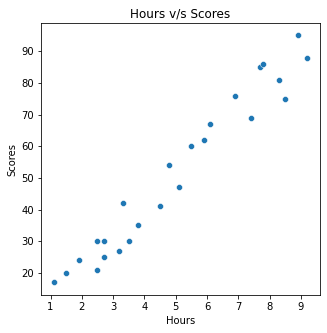

In [10]:
# plotting the Distribution of Hours v/s Scores
plt.figure(figsize=(5,5))
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.title('Hours v/s Scores')
plt.show()

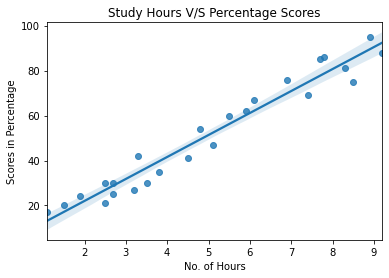

In [11]:
# plotting the seaborn Regression plot to determine the relation between feature and target
sns.regplot(x=data["Hours"],y=data["Scores"],data=data)
plt.title("Study Hours V/S Percentage Scores")
plt.xlabel("No. of Hours")      
plt.ylabel("Scores in Percentage")
plt.show()

It is clearly seen that there is a positive correlation between the study hours and percentage scores

### 6. Preparing the Data

Lets divide the data into inputs i.e. attribute and outputs i.e. labels

In [12]:
x = data.iloc[:,:-1].values    # Attribute
y = data.iloc[:,1].values      # Labels

Next step after getting our attribute and labels is to split the data into training and test sets using the scikit-learn model i.e. train_test_split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

As we can see that both the training and test datasets are ready for training our model. 

### 7. Training the model

Using Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
print("coefficient :", model.coef_)
print("Intercept :", model.intercept_)

coefficient : [9.68207815]
Intercept : 2.82689235389973


<function matplotlib.pyplot.show(close=None, block=None)>

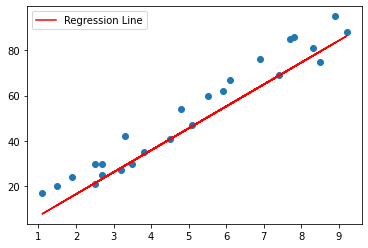

In [16]:
# Plotting the regression line
line = model.coef_*x - model.intercept_

# Plotting from the perspective of test data
plt.scatter(x,y)
plt.plot(x, line , color="red", label="Regression Line")
plt.legend()
plt.show

### 8. Making Predictions

As the model is now trained, we can make predictions accordingly

In [17]:
y_preds = model.predict(x_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [19]:
print("Training score :", model.score(x_train, y_train))
print("Testing score :", model.score(x_test, y_test))


Training score : 0.9491209376364416
Testing score : 0.9678055545167993


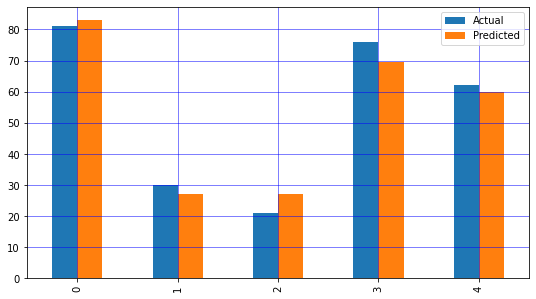

In [20]:
df.plot(kind="bar", figsize=(9,5))
plt.grid(which="major",linewidth="0.5", color="blue")
plt.grid(which="minor",linewidth="0.5", color="red")

## What if the Students Studies for 9.25 hours/day?

In [21]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
new_pred= model.predict(test)
print(f"No. of hours = {hours}")
print(f"Predicted Score = {new_pred[0]}")


No. of hours = 9.25
Predicted Score = 92.38611528261495


### 9. This is the final step evaluating the model

This is the final step involved in order to find how acurate the model is. It basically used to evaluate the performance of different algorithm on a particular dataset.

In [22]:
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_preds))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_preds))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print("R-2 :", metrics.r2_score(y_test, y_preds))


Mean Absolute Error : 3.920751190209927
Mean Squared Error : 18.943211722315283
Root Mean Squared Error : 4.352380006653289
R-2 : 0.9678055545167993


#### Excellent results are displayed as R-2 score tends to be around 96.7% which actually helps in evaluating fit of the model.
#### Even the Accuracy of the model can be counted as 96.8%
#### At last, it indicates that the model is fit for this particular prediction task. 

# Thank You